<a href="https://www.kaggle.com/nikhilsatani/petfinder?scriptVersionId=84622274" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
test = pd.read_csv('../input/petfinder-pawpularity-score/test.csv')

In [3]:
train.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [4]:
test.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0


In [5]:
train.info

<bound method DataFrame.info of                                     Id  Subject Focus  Eyes  Face  Near  \
0     0007de18844b0dbbb5e1f607da0606e0              0     1     1     1   
1     0009c66b9439883ba2750fb825e1d7db              0     1     1     0   
2     0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1   
3     0018df346ac9c1d8413cfcc888ca8246              0     1     1     1   
4     001dc955e10590d3ca4673f034feeef2              0     0     0     1   
...                                ...            ...   ...   ...   ...   
9907  ffbfa0383c34dc513c95560d6e1fdb57              0     0     0     1   
9908  ffcc8532d76436fc79e50eb2e5238e45              0     1     1     1   
9909  ffdf2e8673a1da6fb80342fa3b119a20              0     1     1     1   
9910  fff19e2ce11718548fa1c5d039a5192a              0     1     1     1   
9911  fff8e47c766799c9e12f3cb3d66ad228              0     1     1     1   

      Action  Accessory  Group  Collage  Human  Occlusion  Info  Bl

In [6]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [7]:
train.head()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0,1,1,1,0,0,0,0,0,0,0,0,15
4,0,0,0,1,0,0,1,0,0,0,0,0,72


In [8]:
y, X = train['Pawpularity'], train.drop('Pawpularity', axis=1)

In [9]:
X.shape

(9912, 12)

In [10]:
test.shape

(8, 12)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

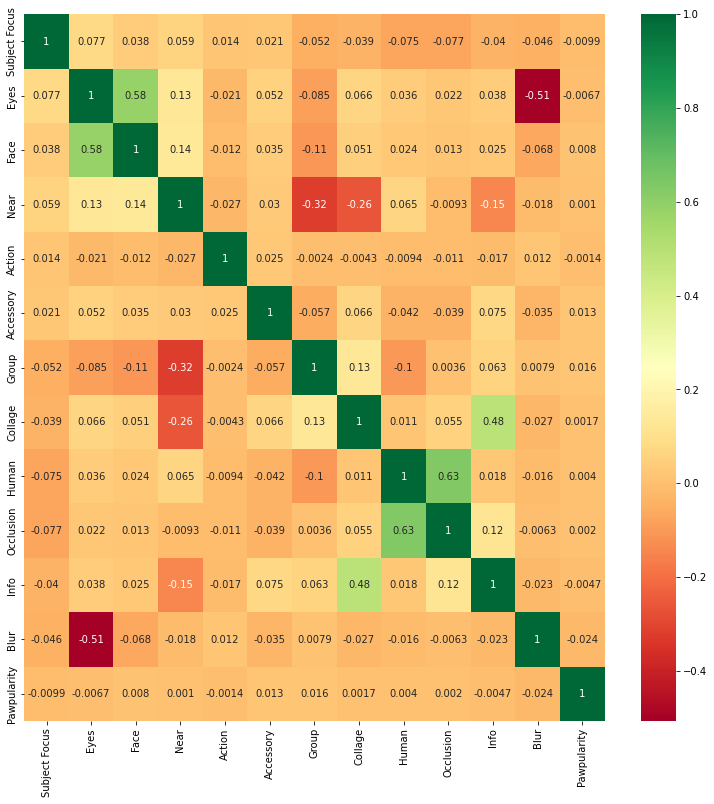

In [12]:
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13, 13))
g = sns.heatmap(train[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
model = GradientBoostingRegressor(learning_rate=0.9, n_estimators=3, max_depth=3)

In [91]:
model.fit(X, y)

GradientBoostingRegressor(learning_rate=0.9, n_estimators=3)

In [92]:
prediction = model.predict(test)

In [93]:
solution = pd.read_csv('../input/petfinder-pawpularity-score/sample_submission.csv')

In [94]:
solution.head()

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,67.75
1,43a2262d7738e3d420d453815151079e,59.15
2,4e429cead1848a298432a0acad014c9d,20.02
3,80bc3ccafcc51b66303c2c263aa38486,94.53
4,8f49844c382931444e68dffbe20228f4,89.82


In [95]:
solution['Pawpularity'] = prediction

In [96]:
solution.head()

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,33.272367
1,43a2262d7738e3d420d453815151079e,33.860500
2,4e429cead1848a298432a0acad014c9d,44.545415
3,80bc3ccafcc51b66303c2c263aa38486,34.372687
4,8f49844c382931444e68dffbe20228f4,30.711775


In [52]:
solution.to_csv('submission.csv', index=False)

In [54]:
solution.head()

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,79.383045
1,43a2262d7738e3d420d453815151079e,19.598866
2,4e429cead1848a298432a0acad014c9d,67.374285
3,80bc3ccafcc51b66303c2c263aa38486,17.908814
4,8f49844c382931444e68dffbe20228f4,29.392396
